# Datos

In [60]:
from pandas.io.stata import StataReader

with StataReader("/content/Latinobarometro_2024_Stata_esp_v20250817.dta") as reader:
    df = reader.read(convert_categoricals=False)
    labels = reader.value_labels()

## Felicidad

In [61]:
conversion = {
    3: 2,  # No muy satisfecho
    4: 1,  # Para nada satisfecho
    2: 3,  # Bastante satisfecho
    1: 4   # Muy satisfecho
}


# Reemplazar valores en la columna P1ST
df["felicidad"] = df["P1ST"].map(conversion)

/tmp/ipython-input-3763869918.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["felicidad"] = df["P1ST"].map(conversion)


## Othering

In [62]:
import numpy as np

# 1. Diccionario estándar LB para confianza
# (ajustá si tu versión tiene otras codificaciones)
conversion_confianza = {
    1: 4,  # Mucha confianza
    2: 3,  # Algo de confianza
    3: 2,  # Poca confianza
    4: 1,  # Ninguna confianza
    8: np.nan,  # No sabe
    9: np.nan,  # No contesta
    98: np.nan,
    99: np.nan
}

def recod_confianza(val):
    return conversion_confianza.get(val, np.nan)

# 2. Recodificar ítems de confianza
# NOMBRES TÍPICOS (revisar en tu dataset real):
df["conf_partidos"] = df["P14ST.G"].apply(recod_confianza) # Partidos Políticos
df["conf_congreso"] = df["P14ST.D"].apply(recod_confianza) # Congreso
df["conf_gobierno"] = df["P14ST.E"].apply(recod_confianza) # Gobierno

# 3. Invertimos: alto = más othering
df["othering_partidos"] = 5 - df["conf_partidos"]
df["othering_congreso"] = 5 - df["conf_congreso"]
df["othering_gobierno"] = 5 - df["conf_gobierno"]

# 4. Índice simple (opcional, útil para descriptivos)
df["othering_index"] = df[
    ["othering_partidos","othering_congreso","othering_gobierno"]
].mean(axis=1)


/tmp/ipython-input-1406318815.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["conf_partidos"] = df["P14ST.G"].apply(recod_confianza) # Partidos Políticos
/tmp/ipython-input-1406318815.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["conf_congreso"] = df["P14ST.D"].apply(recod_confianza) # Congreso
/tmp/ipython-input-1406318815.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

In [63]:
# Z-scores listos para SEM
for c in ["othering_partidos","othering_congreso","othering_gobierno"]:
    df[c + "_z"] = (df[c] - df[c].mean()) / df[c].std()


/tmp/ipython-input-2368253738.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[c + "_z"] = (df[c] - df[c].mean()) / df[c].std()
/tmp/ipython-input-2368253738.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[c + "_z"] = (df[c] - df[c].mean()) / df[c].std()
/tmp/ipython-input-2368253738.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

## Aversión

In [64]:
import numpy as np

# 1. Diccionario genérico de satisfacción / evaluación
conversion_satisfaccion = {
    1: 4,  # Muy satisfecho / muy buena
    2: 3,  # Bastante satisfecho / buena
    3: 2,  # Poco satisfecho / mala
    4: 1,  # Nada satisfecho / muy mala
    8: np.nan,
    9: np.nan,
    98: np.nan,
    99: np.nan
}

def recod_satisfaccion(val):
    return conversion_satisfaccion.get(val, np.nan)

# 2. Recodificar ítems
df["sat_democracia"] = df["P12STGBS.A"].apply(recod_satisfaccion)
df["eval_gobierno"] = df["P15STGBS"].apply(recod_satisfaccion)
df["eval_pais"] = df["P19ST"].apply(recod_satisfaccion)

# 3. Invertir: alto = más aversión
df["aversion_democracia"] = 5 - df["sat_democracia"]
df["aversion_gobierno"] = 5 - df["eval_gobierno"]
df["aversion_pais"] = 5 - df["eval_pais"]

# 4. Índice simple (opcional)
df["aversion_index"] = df[
    ["aversion_democracia","aversion_gobierno","aversion_pais"]
].mean(axis=1)


/tmp/ipython-input-257066772.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["sat_democracia"] = df["P12STGBS.A"].apply(recod_satisfaccion)
/tmp/ipython-input-257066772.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["eval_gobierno"] = df["P15STGBS"].apply(recod_satisfaccion)
/tmp/ipython-input-257066772.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

In [65]:
# Z-scores
for c in ["aversion_democracia","aversion_gobierno","aversion_pais"]:
    df[c + "_z"] = (df[c] - df[c].mean()) / df[c].std()


/tmp/ipython-input-2714206954.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[c + "_z"] = (df[c] - df[c].mean()) / df[c].std()
/tmp/ipython-input-2714206954.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[c + "_z"] = (df[c] - df[c].mean()) / df[c].std()
/tmp/ipython-input-2714206954.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

## Moralization

In [66]:
import numpy as np

# Diccionario típico LB: acuerdo / desacuerdo
# (1=Totalmente de acuerdo ... 4=Totalmente en desacuerdo)
conversion_moral = {
    1: 4,  # Totalmente de acuerdo
    2: 3,  # De acuerdo
    3: 2,  # En desacuerdo
    4: 1,  # Totalmente en desacuerdo
    8: np.nan,
    9: np.nan,
    98: np.nan,
    99: np.nan
}

def recod_moral(val):
    return conversion_moral.get(val, np.nan)

# Recodificar ítems
df["moral_autoritarismo"] = df["P11STGBS"].apply(recod_moral)
df["moral_nodemocratico"] = df["P18ST.B"].apply(recod_moral) # Gobierno no democratico
df["moral_presidente"] = df["P18ST.C"].apply(recod_moral) # Por encima de las leyes

# Índice simple (opcional)
df["moralization_index"] = df[
    ["moral_autoritarismo","moral_nodemocratico","moral_presidente"]
].mean(axis=1)


/tmp/ipython-input-566595662.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["moral_autoritarismo"] = df["P11STGBS"].apply(recod_moral)
/tmp/ipython-input-566595662.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["moral_nodemocratico"] = df["P18ST.B"].apply(recod_moral) # Gobierno no democratico
/tmp/ipython-input-566595662.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once u

In [67]:
# Z-scores
for c in ["moral_autoritarismo","moral_nodemocratico"]:
    df[c + "_z"] = (df[c] - df[c].mean()) / df[c].std()


/tmp/ipython-input-2595157724.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[c + "_z"] = (df[c] - df[c].mean()) / df[c].std()
/tmp/ipython-input-2595157724.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[c + "_z"] = (df[c] - df[c].mean()) / df[c].std()


## Polarización ideológica

In [68]:
import numpy as np

# Limpieza básica P16ST
def recod_p16(val):
    try:
        num = float(val)
        if num in [97, 99]:
            return np.nan
        return num
    except:
        return np.nan

df["ideologia_lr"] = df["P16ST"].apply(recod_p16)

# Polarización ideológica (distancia al centro)
df["polarizacion_ideologica"] = abs(df["ideologia_lr"] - 5)


/tmp/ipython-input-3657478225.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ideologia_lr"] = df["P16ST"].apply(recod_p16)
/tmp/ipython-input-3657478225.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["polarizacion_ideologica"] = abs(df["ideologia_lr"] - 5)


In [69]:
df["identificacion_partidaria"] = df["P38STGBS"].replace({
    1: 1,
    2: 0,
    8: np.nan,
    9: np.nan,
    98: np.nan,
    99: np.nan
})


/tmp/ipython-input-2391901752.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["identificacion_partidaria"] = df["P38STGBS"].replace({


In [70]:
# Z-scores
df["polarizacion_ideologica_z"] = (
    df["polarizacion_ideologica"] - df["polarizacion_ideologica"].mean()
) / df["polarizacion_ideologica"].std()

df["identificacion_partidaria_z"] = (
    df["identificacion_partidaria"] - df["identificacion_partidaria"].mean()
) / df["identificacion_partidaria"].std()

# Índice estructural
df["polarizacion_estructural_index"] = df[
    ["polarizacion_ideologica_z","identificacion_partidaria_z"]
].mean(axis=1)


/tmp/ipython-input-1462523288.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["polarizacion_ideologica_z"] = (
/tmp/ipython-input-1462523288.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["identificacion_partidaria_z"] = (
/tmp/ipython-input-1462523288.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfram

## Engagement

In [71]:
import numpy as np

# 1. Interés en la política
# 1=Muy interesado ... 4=Nada interesado
conversion_interes = {
    1: 4,
    2: 3,
    3: 2,
    4: 1,
    8: np.nan,
    9: np.nan,
    98: np.nan,
    99: np.nan
}

def recod_interes(val):
    return conversion_interes.get(val, np.nan)

df["interes_politica"] = df["P36STGBS"].apply(recod_interes)

# 2. Eficacia política
# 1=Sí, mi voto hace diferencia / 2=No
df["eficacia_voto"] = df["P26ST"].replace({
    1: 1,
    2: 0,
    8: np.nan,
    9: np.nan,
    98: np.nan,
    99: np.nan
})

# 3. Representación política
# 1=Sí se siente representado / 2=No
df["representacion"] = df["P25ST"].replace({
    1: 1,
    2: 0,
    8: np.nan,
    9: np.nan,
    98: np.nan,
    99: np.nan
})

# 4. Índice simple (opcional)
df["engagement_index"] = df[
    ["interes_politica","eficacia_voto","representacion"]
].mean(axis=1)


/tmp/ipython-input-1714760298.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["interes_politica"] = df["P36STGBS"].apply(recod_interes)
/tmp/ipython-input-1714760298.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["eficacia_voto"] = df["P26ST"].replace({
/tmp/ipython-input-1714760298.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a 

In [72]:
# Z-scores
for c in ["interes_politica","eficacia_voto","representacion"]:
    df[c + "_z"] = (df[c] - df[c].mean()) / df[c].std()


/tmp/ipython-input-2469395467.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[c + "_z"] = (df[c] - df[c].mean()) / df[c].std()
/tmp/ipython-input-2469395467.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[c + "_z"] = (df[c] - df[c].mean()) / df[c].std()
/tmp/ipython-input-2469395467.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

## Political Participation

In [73]:
import numpy as np

def recod_participation(val):
    if val in [95, 96]:
        return 0   # blanco o no votó
    else:
        return 1   # voto efectivo

df["institutional_political_participation"] = df["P39STGBS.A"].apply(recod_participation)


/tmp/ipython-input-1986490592.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["institutional_political_participation"] = df["P39STGBS.A"].apply(recod_participation)


In [74]:
def recod_participation(val):
    if val in [1]:
        return 1   # 'Manifestacion/protesta'
    else:
        return 0   # Otro

df["non_institutional_political_participation"] = df["P44ST"].apply(recod_participation)

/tmp/ipython-input-2011807245.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["non_institutional_political_participation"] = df["P44ST"].apply(recod_participation)


In [75]:
def recod_participation(val):
    if val in [1]:
        return 2   # 'Redes sociales'
    else:
        return 0   # Otro

df["non_institutional_political_participation_redes"] = df["P44ST"].apply(recod_participation)

/tmp/ipython-input-3323328573.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["non_institutional_political_participation_redes"] = df["P44ST"].apply(recod_participation)


In [76]:
labels['P44ST']

{np.int32(1): 'Manifestacion/protesta',
 np.int32(2): 'Redes sociales',
 np.int32(3): 'Entre amigos',
 np.int32(4): 'En familia',
 np.int32(5): 'No suelo hacerlo',
 np.int32(2147483626): 'No sabe / No contesta'}

## Controles

In [77]:
# === 1. Revisión rápida de las columnas ===
cols_check = ["EDAD", "SEXO", "S11", "S5", "S30"]

# === 2. Conversiones ===
##################################################################
# Edad: asegurar numérico
df["edad"] = pd.to_numeric(df["EDAD"], errors="coerce")

##################################################################
# Género: 1 = hombre, 2 = mujer → 0/1
df["genero"] = df["SEXO"].replace({1: 0, 2: 1})

##################################################################
# Educación: usar S16 (1 = sin estudios ... 14 = universidad)
# Paso 1: convertir a numérico
df["educacion_num"] = pd.to_numeric(df["S11"], errors="coerce")

# Paso 2: definir el escalador manual
def escalar_educacion(x):
    if pd.isna(x):
        return np.nan
    if x == 1:
        return 0  # sin estudios
    elif 2 <= x <= 13:
        return x - 1  # años reales (1–12)
    elif x == 14:  # universitario incompleto
        return 14
    elif x == 15:  # universitario completo
        return 16
    elif x == 16:  # técnico incompleto
        return 13
    elif x == 17:  # técnico completo
        return 14
    else:
        return np.nan

df["educacion"] = df["educacion_num"].apply(escalar_educacion)

##################################################################
# El salario o el sueldo que Ud percibe, les permite...
df["S5_num"] = pd.to_numeric(df["S5"], errors="coerce")

# Paso 2: diccionario de conversión
conv_s5 = {
    1: 4,  # les alcanza bien → muy buena situación
    2: 3,  # les alcanza justo
    3: 2,  # no les alcanza
    4: 1,  # no les alcanza, grandes dificultades
    2147483622: np.nan,  # no sabe
    2147483623: np.nan   # no contesta
}

# Paso 3: aplicar conversión
df["econ"] = df["S5_num"].replace(conv_s5)

##################################################################
# Edad al cuadrado
df["edad2"]=df["edad"]**2


##################################################################
# ¿Cómo calificaría en general la situación económica actual del país? Diría Ud. que es...?
# Paso 1: convertir P6 a numérico
df["P6_num"] = pd.to_numeric(df["P6STGBS"], errors="coerce")

# Paso 2: diccionario de conversión
# Invertimos la escala para que valores altos = percepción económica más positiva
conv_p6 = {
    1: 5,  # muy buena  → muy positiva
    2: 4,  # buena
    3: 3,  # regular
    4: 2,  # mala
    5: 1,  # muy mala → muy negativa
    2147483622: np.nan,  # no sabe
    2147483623: np.nan   # no contesta
}

# Paso 3: aplicar conversión
df["econ_pais"] = df["P6_num"].replace(conv_p6)



##################################################################
# P10STGBS. Hablando en general, ¿Diría Ud. que se puede confiar en la mayoría de las personas o que uno nunca es lo suficientemente cuidadoso en el trato con los demás?
df["P10_num"] = pd.to_numeric(df["P10STGBS"], errors="coerce")
conv_p10 = {
    1: 1,  # Se puede confiar en la mayoría
    2: 0,  # Uno nunca es suficientemente cuidadoso
    2147483622: np.nan,  # no sabe
    2147483623: np.nan   # no contesta
}

# Paso 3: aplicar conversión
df["confianza"] = df["P10_num"].replace(conv_p10)


/tmp/ipython-input-2111694110.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["edad"] = pd.to_numeric(df["EDAD"], errors="coerce")
/tmp/ipython-input-2111694110.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["genero"] = df["SEXO"].replace({1: 0, 2: 1})
/tmp/ipython-input-2111694110.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

## Normalización

In [78]:
vars_modelo = [
    # Outcome
    "felicidad",

    # Othering
    "othering_partidos",
    "othering_congreso",
    "othering_gobierno",

    # Aversion
    "aversion_democracia",
    "aversion_gobierno",
    "aversion_pais",

    # Moralization
    "moral_autoritarismo",
    "moral_nodemocratico",
    "moral_presidente",

    # Engagement
    "interes_politica",
    "eficacia_voto",
    "representacion",

    # Ideológica
    "polarizacion_ideologica",
    "identificacion_partidaria",

    # Participación
    "institutional_political_participation",
    "non_institutional_political_participation",
    "non_institutional_political_participation_redes",

    # Controles
    "edad", "genero", "educacion", "econ", "edad2", "econ_pais", "confianza"]


In [79]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df_sem = df[vars_modelo].copy()

scaler = StandardScaler()
df_sem_z = pd.DataFrame(
    scaler.fit_transform(df_sem),
    columns=[col + "_z" for col in df_sem.columns],
    index=df_sem.index
)

df = pd.concat([df, df_sem_z], axis=1)

df_sem_z.describe().T

,count,mean,std,min,25%,50%,75%,max
felicidad_z,19067.0,-1.490623e-18,1.000026,-2.573280,-0.180929,-0.180929,1.015247,1.015247
othering_partidos_z,18904.0,1.804171e-17,1.000026,-2.774341,-0.372796,0.827977,0.827977,0.827977
othering_congreso_z,18740.0,-1.516633e-17,1.000027,-2.291407,-1.189961,-0.088515,1.012930,1.012930
othering_gobierno_z,19013.0,1.225782e-16,1.000026,-1.923266,-0.935581,0.052104,1.039789,1.039789
aversion_democracia_z,18719.0,-2.277502e-16,1.000027,-1.896430,-0.842101,0.212229,1.266558,1.266558
aversion_gobierno_z,18395.0,-1.174259e-16,1.000027,-1.100547,-1.100547,0.908639,0.908639,0.908639
aversion_pais_z,4812.0,-1.653799e-16,1.000104,-0.979821,-0.979821,-0.173028,0.633765,1.440558
moral_autoritarismo_z,17952.0,7.599388e-17,1.000028,-1.507208,-1.507208,0.821512,0.821512,0.821512
moral_nodemocratico_z,18550.0,2.328895e-16,1.000027,-1.853598,-0.660778,0.532043,0.532043,1.724863
moral_presidente_z,18693.0,1.216357e-17,1.000027,-1.434645,-0.276858,-0.276858,0.880929,2.038716


# Regresión lineal naive

In [80]:
import statsmodels.formula.api as smf

m0 = smf.ols("felicidad_z ~ interes_politica_z + eficacia_voto_z + representacion_z + edad_z + genero_z + educacion_z + econ_z + edad2_z + econ_pais_z + confianza_z" ,
             data=df_sem_z).fit(cov_type="HC3")

print(m0.summary())

                            OLS Regression Results                            
Dep. Variable:            felicidad_z   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     99.98
Date:                Tue, 10 Feb 2026   Prob (F-statistic):          1.98e-202
Time:                        20:15:05   Log-Likelihood:                -23811.
No. Observations:               17205   AIC:                         4.764e+04
Df Residuals:                   17194   BIC:                         4.773e+04
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0057      0

In [81]:
df_sem_z["PsychPol_mean"] = df_sem_z[[
    "othering_partidos_z","othering_congreso_z","othering_gobierno_z",
    "aversion_democracia_z","aversion_gobierno_z","aversion_pais_z",
    "moral_autoritarismo_z","moral_nodemocratico_z",
    "polarizacion_ideologica_z","identificacion_partidaria_z"
]].mean(axis=1)



m_psych = smf.ols("""
felicidad_z ~ PsychPol_mean
             + interes_politica_z
             + eficacia_voto_z
             + representacion_z + edad_z + genero_z + educacion_z + econ_z + edad2_z + econ_pais_z + confianza_z"""
             , data=df_sem_z).fit(cov_type="HC3")

print(m_psych.summary())


                            OLS Regression Results                            
Dep. Variable:            felicidad_z   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     98.61
Date:                Tue, 10 Feb 2026   Prob (F-statistic):          1.18e-218
Time:                        20:15:05   Log-Likelihood:                -23776.
No. Observations:               17205   AIC:                         4.758e+04
Df Residuals:                   17193   BIC:                         4.767e+04
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0055      0

# SEM

In [82]:
%%capture
!pip install semopy

In [83]:
from semopy import Model

model_desc = """
Othering =~ othering_partidos_z + othering_congreso_z + othering_gobierno_z
Aversion =~ aversion_democracia_z + aversion_gobierno_z + aversion_pais_z
Moralization =~ moral_autoritarismo_z + moral_nodemocratico_z
Engagement =~ interes_politica_z + eficacia_voto_z + representacion_z

IdeologicalPolarization =~ polarizacion_ideologica_z + identificacion_partidaria_z
PsychologicalPolarization =~ Othering + Aversion + Moralization + IdeologicalPolarization

felicidad_z ~ PsychologicalPolarization + Engagement + IdeologicalPolarization + edad_z + edad2_z + genero_z + educacion_z + econ_z + econ_pais_z + confianza_z
"""


model = Model(model_desc)

model.fit(df_sem_z)
model.inspect()



,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Othering,~,PsychologicalPolarization,1.000000e+00,-,-,-
1,Aversion,~,PsychologicalPolarization,1.072048e+00,0.01962,54.640363,0.0
2,Moralization,~,PsychologicalPolarization,-3.822142e-01,0.014883,-25.680438,0.0
3,IdeologicalPolarization,~,PsychologicalPolarization,-1.058919e-01,0.014411,-7.347859,0.0
4,othering_partidos_z,~,Othering,1.000000e+00,-,-,-
5,othering_congreso_z,~,Othering,1.112814e+00,0.014806,75.16047,0.0
6,othering_gobierno_z,~,Othering,1.322761e+00,0.016188,81.713344,0.0
7,aversion_democracia_z,~,Aversion,1.000000e+00,-,-,-
8,aversion_gobierno_z,~,Aversion,1.039227e+00,0.015439,67.31219,0.0
9,aversion_pais_z,~,Aversion,-2.431046e-01,0.013099,-18.559219,0.0


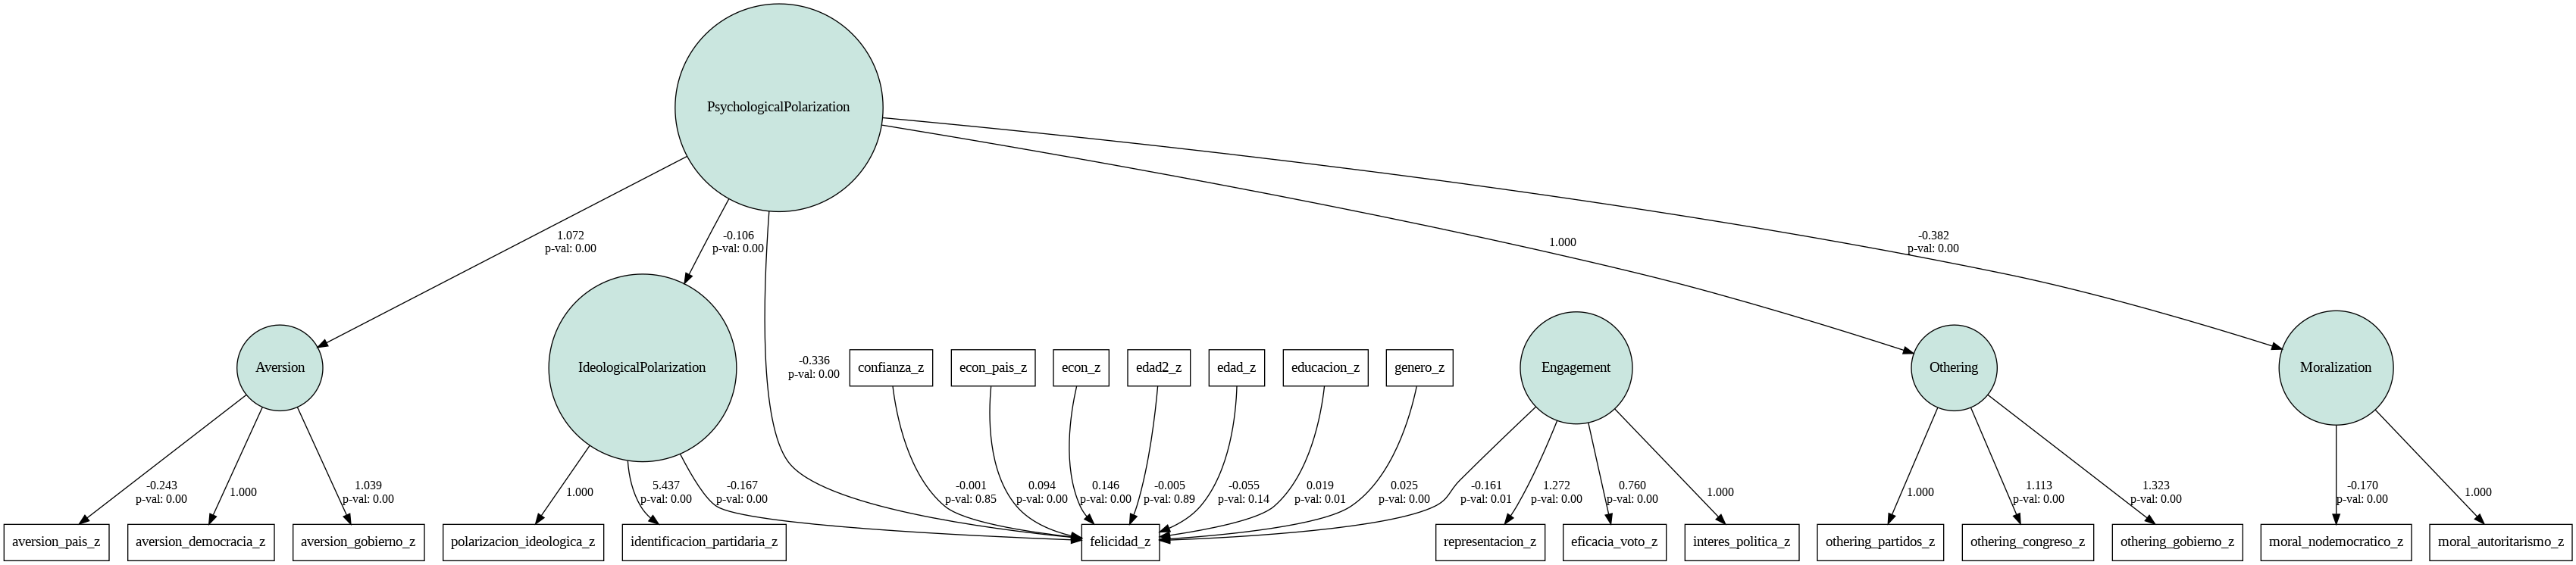

In [84]:
from IPython.display import Image, display
from semopy import semplot

semplot(model, "sem_model.png")
display(Image("sem_model.png"))


# Con y sin Twitter

In [85]:
from semopy import Model

# separar muestras
df_twitter = df_sem_z[df['S14M.4'] == 1]
df_notwitter = df_sem_z[df['S14M.4'] == 0]

# mismo modelo
model_desc = """
Othering =~ othering_partidos_z + othering_congreso_z + othering_gobierno_z
Aversion =~ aversion_democracia_z + aversion_gobierno_z + aversion_pais_z
Moralization =~ moral_autoritarismo_z + moral_nodemocratico_z
Engagement =~ interes_politica_z + eficacia_voto_z + representacion_z

IdeologicalPolarization =~ polarizacion_ideologica_z + identificacion_partidaria_z
PsychologicalPolarization =~ Othering + Aversion + Moralization + IdeologicalPolarization

felicidad_z ~ PsychologicalPolarization + Engagement + IdeologicalPolarization
"""

# Twitter
model_tw = Model(model_desc)
model_tw.fit(df_twitter)
res_tw = model_tw.inspect()

# No Twitter
model_notw = Model(model_desc)
model_notw.fit(df_notwitter)
res_notw = model_notw.inspect()


In [86]:
def extract_paths(res):
    return res[res['op'] == '~'][['lval','rval','Estimate','p-value']]

tw_paths = extract_paths(res_tw)
notw_paths = extract_paths(res_notw)

In [87]:
notw_paths

,lval,rval,Estimate,p-value
0,Othering,PsychologicalPolarization,1.000000,-
1,Aversion,PsychologicalPolarization,1.078025,0.0
2,Moralization,PsychologicalPolarization,-0.373944,0.0
3,IdeologicalPolarization,PsychologicalPolarization,-0.114079,0.0
4,othering_partidos_z,Othering,1.000000,-
5,othering_congreso_z,Othering,1.114642,0.0
6,othering_gobierno_z,Othering,1.321948,0.0
7,aversion_democracia_z,Aversion,1.000000,-
8,aversion_gobierno_z,Aversion,1.041712,0.0
9,aversion_pais_z,Aversion,-0.226494,0.0


In [88]:
tw_paths

,lval,rval,Estimate,p-value
0,Othering,PsychologicalPolarization,1.000000,-
1,Aversion,PsychologicalPolarization,1.079661,0.0
2,Moralization,PsychologicalPolarization,-0.405898,0.0
3,IdeologicalPolarization,PsychologicalPolarization,-0.106251,0.008732
4,othering_partidos_z,Othering,1.000000,-
5,othering_congreso_z,Othering,1.114497,0.0
6,othering_gobierno_z,Othering,1.349230,0.0
7,aversion_democracia_z,Aversion,1.000000,-
8,aversion_gobierno_z,Aversion,1.009588,0.0
9,aversion_pais_z,Aversion,-0.371542,0.0


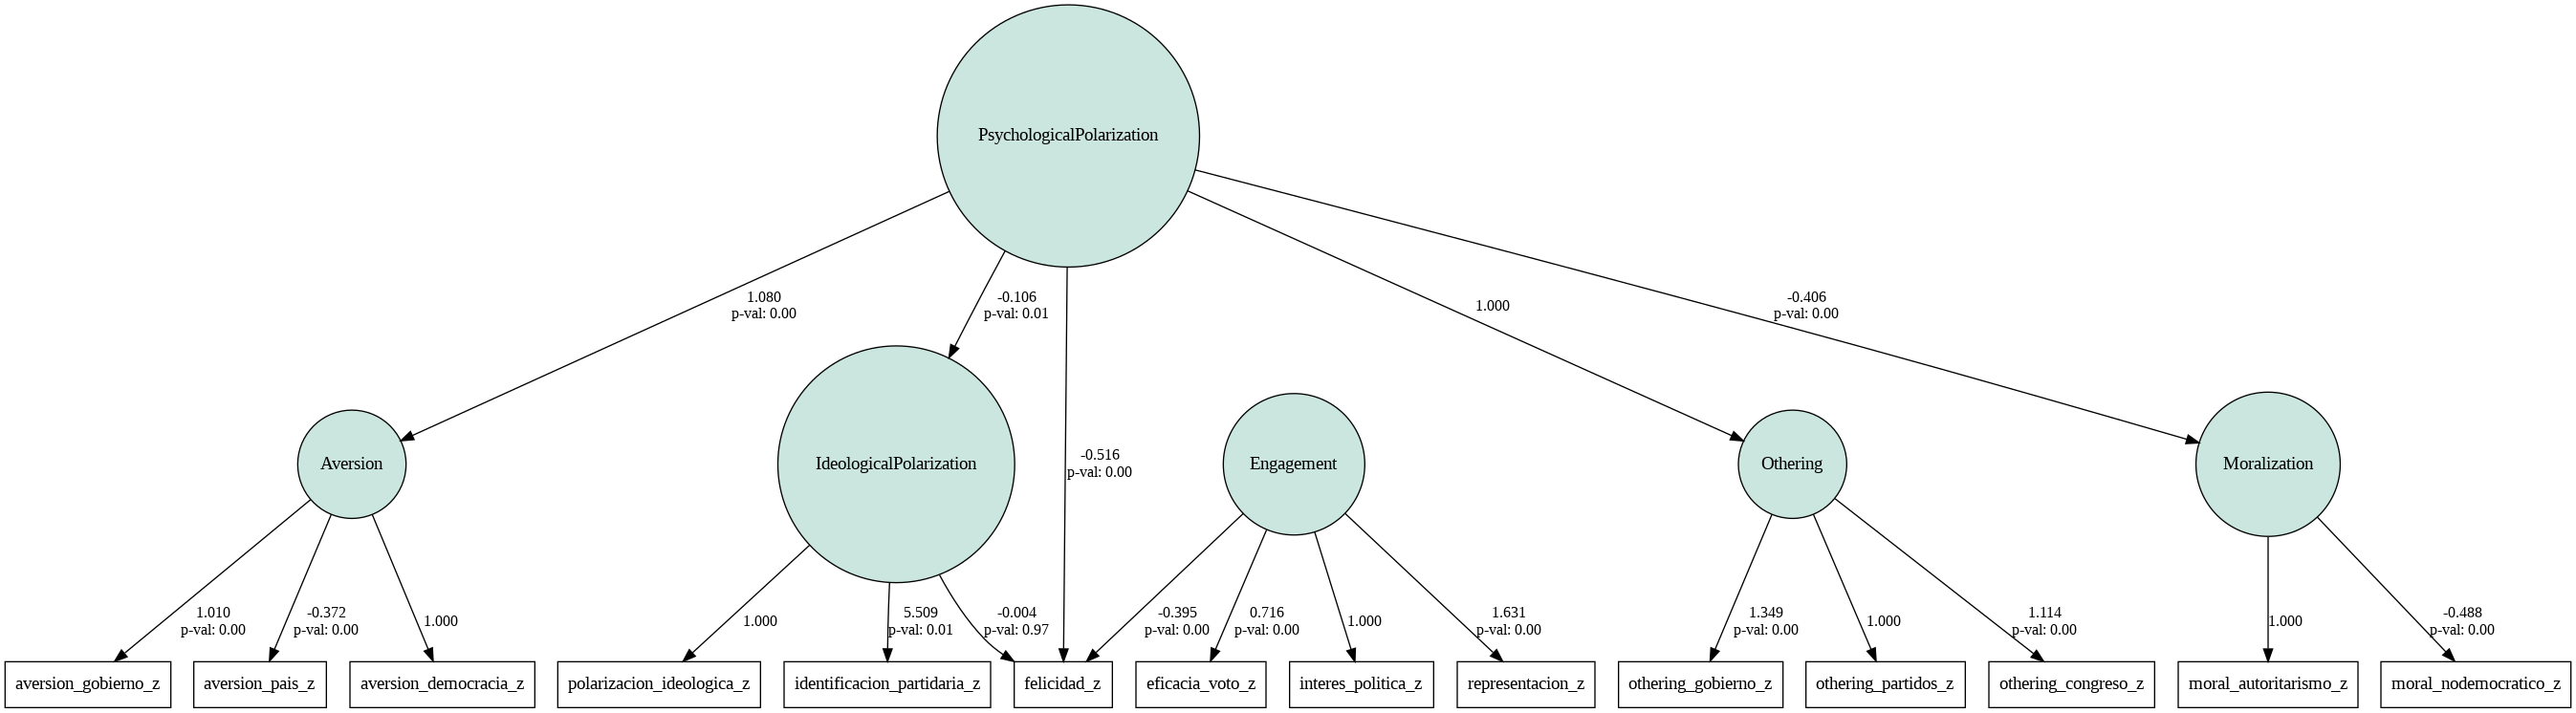

In [89]:
from IPython.display import Image, display
from semopy import semplot

semplot(model_tw, "sem_model.png")
display(Image("sem_model.png"))

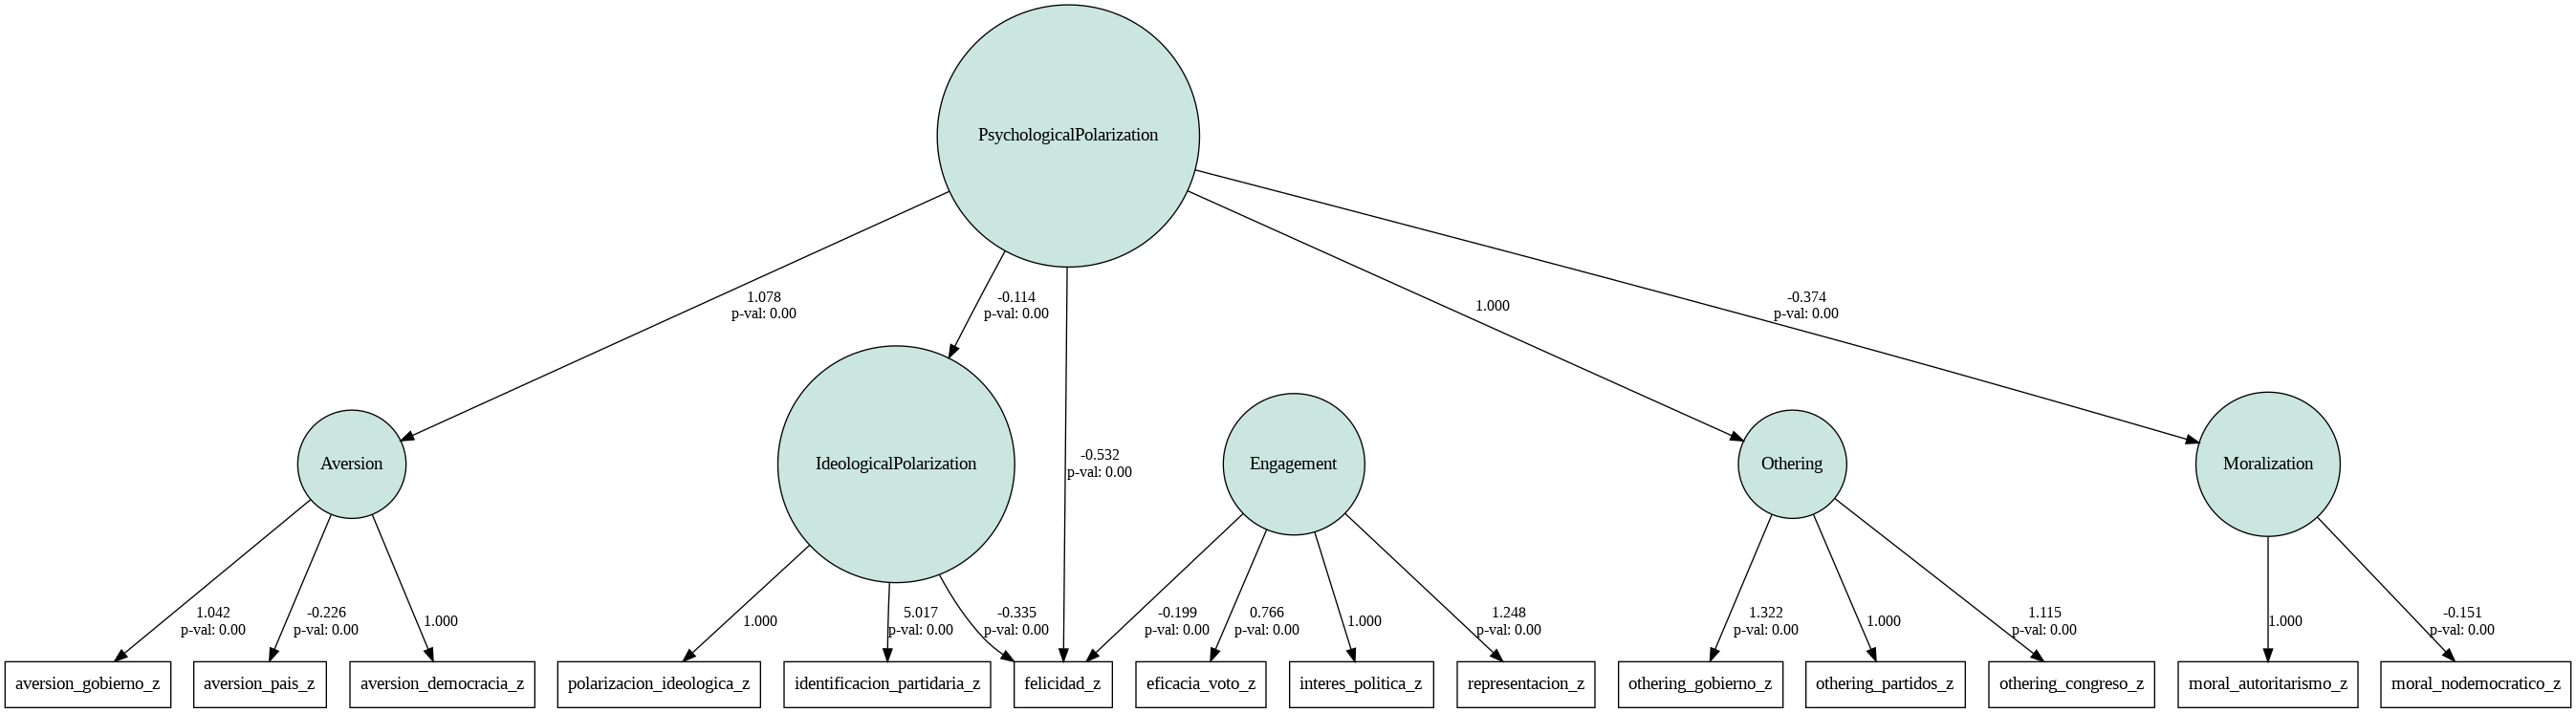

In [90]:
from IPython.display import Image, display
from semopy import semplot

semplot(model_notw, "sem_model.png")
display(Image("sem_model.png"))

# Con participación

In [91]:
model_desc = """
Othering =~ othering_partidos_z + othering_congreso_z + othering_gobierno_z
Aversion =~ aversion_democracia_z + aversion_gobierno_z + aversion_pais_z
Moralization =~ moral_autoritarismo_z + moral_nodemocratico_z
Engagement =~ interes_politica_z + eficacia_voto_z + representacion_z

IdeologicalPolarization =~ polarizacion_ideologica_z + identificacion_partidaria_z
PsychologicalPolarization =~ Othering + Aversion + Moralization + IdeologicalPolarization

institutional_political_participation_z ~ PsychologicalPolarization + Engagement
non_institutional_political_participation_z ~ PsychologicalPolarization + Engagement

felicidad_z ~ PsychologicalPolarization + Engagement + institutional_political_participation_z + non_institutional_political_participation_z + non_institutional_political_participation_redes_z
"""

In [92]:
model_con_part = Model(model_desc)

model_con_part.fit(df_sem_z)
model_con_part.inspect()

model_con_part.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Othering,~,PsychologicalPolarization,1.000000e+00,-,-,-
1,Aversion,~,PsychologicalPolarization,1.075875e+00,0.019252,55.884837,0.0
2,Moralization,~,PsychologicalPolarization,-3.993714e-01,0.01505,-26.536398,0.0
3,IdeologicalPolarization,~,PsychologicalPolarization,-1.172821e-01,0.014609,-8.028267,0.0
4,institutional_political_participation_z,~,PsychologicalPolarization,1.636887e-01,0.054556,3.000386,0.002696
5,institutional_political_participation_z,~,Engagement,1.100445e+00,0.070691,15.56704,0.0
6,non_institutional_political_participation_z,~,PsychologicalPolarization,4.694204e-01,0.04853,9.672867,0.0
7,non_institutional_political_participation_z,~,Engagement,6.709553e-01,0.05946,11.284237,0.0
8,othering_partidos_z,~,Othering,1.000000e+00,-,-,-
9,othering_congreso_z,~,Othering,1.108020e+00,0.014617,75.801686,0.0


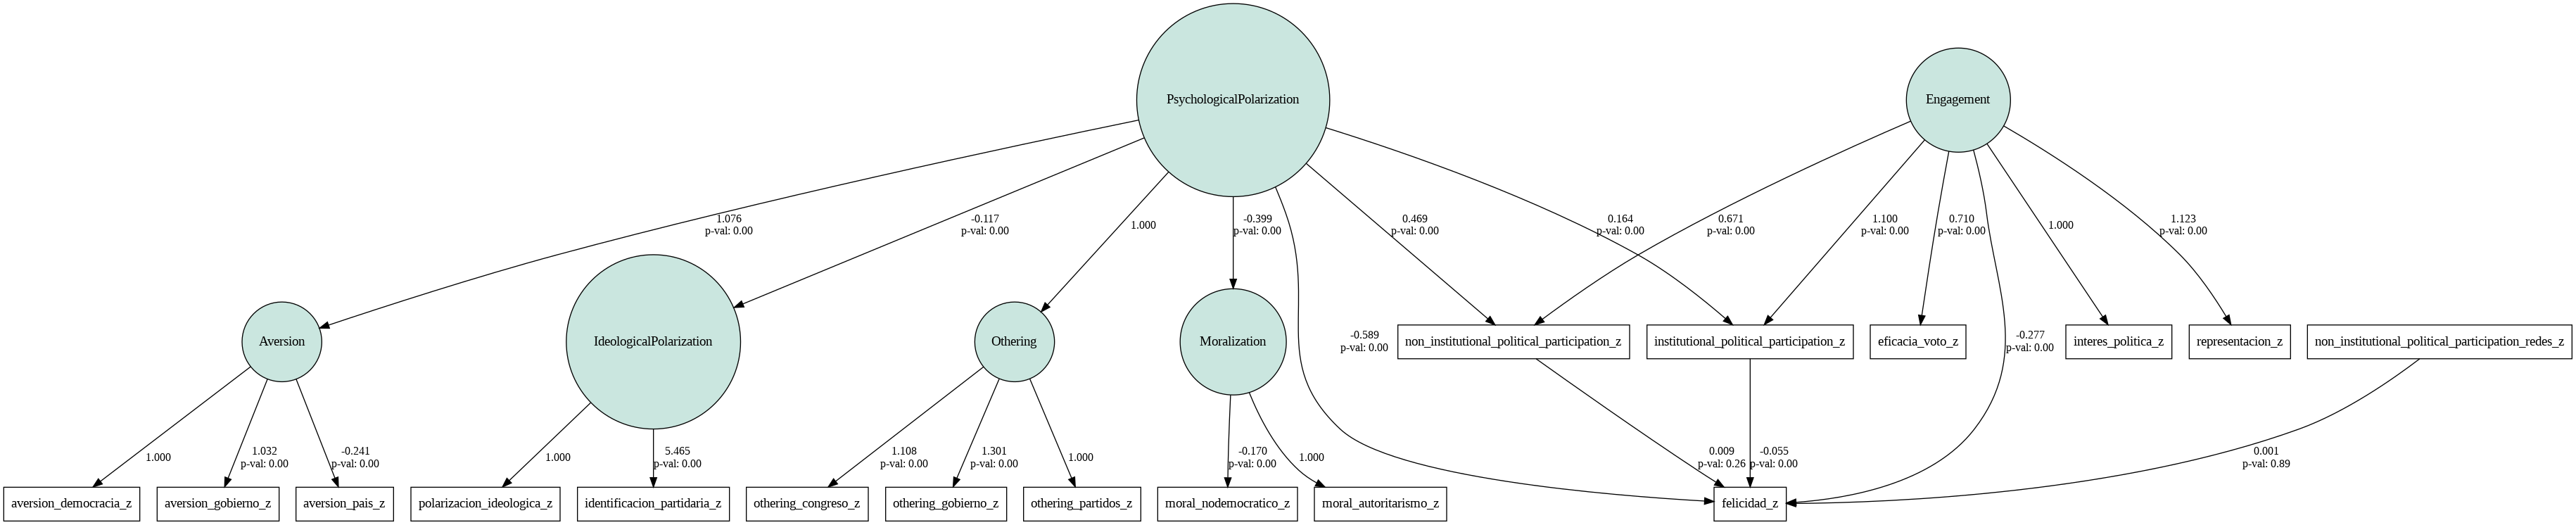

In [93]:
from IPython.display import Image, display
from semopy import semplot

semplot(model_con_part, "sem_model.png")
display(Image("sem_model.png"))

# Tabla Salida

In [94]:
import pandas as pd

def extract_params(model, name):
    df = model.inspect()
    df = df[['lval', 'op', 'rval', 'Estimate', 'Std. Err', 'p-value']]
    df = df.rename(columns={
        'Estimate': f'{name}_est',
        'Std. Err': f'{name}_se',
        'p-value': f'{name}_p'
    })
    return df

dfs = [
    extract_params(model, 'M1'),
    extract_params(model_tw, 'M2'),
    extract_params(model_notw, 'M3'),
    extract_params(model_con_part, 'M4')
]

from functools import reduce
table = reduce(
    lambda left, right: pd.merge(left, right, on=['lval','op','rval'], how='outer'),
    dfs
)

table = table.fillna("")
table = table.replace("-", "")


name_map = {
    "PsychologicalPolarization": "Psych. Pol.",
    "IdeologicalPolarization": "Ideol. Pol.",
    "non_institutional_political_participation_z": "Part.Marchas",
    "non_institutional_political_participation_redes_z": "Part.Redes",
    "institutional_political_participation_z": "Inst. part.",
    "aversion_democracia_z": "Aver. Demo.",
    "aversion_gobierno_z": "Aver. Gob.",
    "aversion_pais_z": "Aver. País",
    "identificacion_partidaria_z": "Indent. Part.",
    "felicidad_z": "Felicidad",
    "eficacia_voto_z": "Eficacia",
    "interes_politica_z": "Interes",
    "moral_autoritarismo_z": "Autoritarismo",
    "moral_nodemocratico_z": "Nodemocratismo",
    "moral_presidente_z": "Presidente",
    "othering_congreso_z": "Congreso",
    "othering_gobierno_z": "Gobierno",
    "othering_partidos_z": "Partidos",
    "polarizacion_ideologica_z": "Polarización",
    "representacion_z": "Representación"

}

table = table.replace(name_map)

table.to_latex('modelos.tex', float_format="%.3f", escape=True, longtable=True)